<a href="https://colab.research.google.com/github/hyulianton/JaringanSyarafTiruan/blob/main/jst_Penerapan_Recurrent_Neural_Network_(RNN)_untuk_Analisis_Sentimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contoh Penerapan Recurrent Neural Network (RNN) untuk Analisis Sentimen

Program ini menunjukkan langkah-langkah dasar untuk membangun dan melatih Recurrent Neural Network (RNN) menggunakan Keras (bagian dari TensorFlow) untuk tugas klasifikasi teks. Kita akan menggunakan dataset publik IMDb Movie Reviews yang berisi 50.000 ulasan film berlabel (positif/negatif).

Dataset ini sangat cocok untuk RNN karena ulasan film adalah data sekuensial (urutan kata).

## Cell 1: Setup dan Import Library

Cell ini berfungsi untuk menyiapkan lingkungan, menginstal pustaka yang diperlukan, dan mengimpor modul utama.

In [1]:
# Cek versi TensorFlow
import tensorflow as tf
print(f"Versi TensorFlow: {tf.__version__}")

# Import library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Konfigurasi plot untuk tampilan yang lebih baik (opsional)
%matplotlib inline
plt.style.use('ggplot')

Versi TensorFlow: 2.19.0


## Cell 2: Mendownload dan Memuat Dataset IMDb

TensorFlow/Keras menyediakan dataset IMDb secara langsung, termasuk fungsi untuk mengunduh dan memuatnya ke dalam memori. Dataset ini sudah diproses di mana setiap ulasan diwakili oleh urutan bilangan bulat (indeks kata).

Kita akan memuat 10.000 kata yang paling sering muncul (`num_words=10000`) untuk mengurangi kompleksitas.

In [12]:
# Parameter: Hanya pertahankan 10.000 kata yang paling sering muncul
max_words = 10000

# Memuat dataset
# x_train dan x_test berisi urutan bilangan bulat (ulasan)
# y_train dan y_test berisi label (0 untuk negatif, 1 untuk positif)
print("Memuat dataset IMDb...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# --- Tambahan: Simpan salinan data asli sebelum padding ---
# Kita perlu data ini di Cell 8 untuk menerjemahkan teks asli (decoding)
# Variabel x_train dan x_test akan dimodifikasi di Cell 3.
x_train_original = x_train
x_test_original = x_test
# -----------------------------------------------------------

print(f"Jumlah sampel pelatihan: {len(x_train)}")
print(f"Jumlah sampel pengujian: {len(x_test)}")
print(f"Panjang ulasan pertama (sebelum padding): {len(x_train[0])}")
print(f"Label ulasan pertama: {y_train[0]}")

Memuat dataset IMDb...
Jumlah sampel pelatihan: 25000
Jumlah sampel pengujian: 25000
Panjang ulasan pertama (sebelum padding): 218
Label ulasan pertama: 1


## Cell 3: Pra-pemrosesan Data (Padding Sekuens)

Model RNN memerlukan input sekuensial dengan panjang yang seragam. Karena ulasan memiliki panjang yang berbeda, kita akan menggunakan teknik padding untuk membuat semua urutan memiliki panjang maksimum yang sama.

Kita akan membatasi panjang ulasan maksimum (`maxlen`) menjadi 500 kata. Ulasan yang lebih pendek akan ditambahkan angka 0 (padding), dan ulasan yang lebih panjang akan dipotong (truncating).

In [3]:
# Batas panjang maksimum ulasan
maxlen = 500

print(f"\nMelakukan padding urutan hingga panjang {maxlen}...")
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print("Bentuk data pelatihan (setelah padding):", x_train.shape)
print("Bentuk data pengujian (setelah padding):", x_test.shape)
print(f"Panjang ulasan pertama (setelah padding): {len(x_train[0])}")

# Contoh ulasan pertama setelah padding
# Bilangan 0 yang ditambahkan ada di depan (default pad_sequences)
print("\nContoh 10 elemen pertama dari ulasan pertama setelah padding:")
print(x_train[0][:10])


Melakukan padding urutan hingga panjang 500...
Bentuk data pelatihan (setelah padding): (25000, 500)
Bentuk data pengujian (setelah padding): (25000, 500)
Panjang ulasan pertama (setelah padding): 500

Contoh 10 elemen pertama dari ulasan pertama setelah padding:
[0 0 0 0 0 0 0 0 0 0]


## Cell 4: Mendefinisikan Model RNN Sederhana

Kita akan membangun model RNN sederhana menggunakan layer berikut:

1. **Embedding Layer**: Mengubah indeks kata (integer) menjadi vektor kepadatan (dense vector) yang menangkap makna semantik kata. Ini adalah lapisan pertama untuk input teks.

2. **SimpleRNN Layer**: Lapisan RNN dasar yang memproses urutan kata demi kata.

3. **Dense Layer**: Lapisan Fully Connected (FC) untuk klasifikasi output. Karena ini adalah klasifikasi biner (positif/negatif), kita menggunakan 1 unit dan fungsi aktivasi `sigmoid`.

In [4]:
# Dimensi embedding (ukuran vektor untuk setiap kata)
embedding_dim = 32

# Inisialisasi model Sequential
model = Sequential()

# Layer 1: Embedding
# Input: max_words (10000), Output: embedding_dim (32), Input Length: maxlen (500)
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

# Layer 2: SimpleRNN
# Unit RNN (jumlah sel memori)
model.add(SimpleRNN(units=32))

# Layer 3: Dense Output
# 1 unit karena ini klasifikasi biner (positif/negatif)
model.add(Dense(1, activation='sigmoid'))

# Tampilkan ringkasan model
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Cell 5: Kompilasi dan Pelatihan Model

Kita akan mengkompilasi model dengan menentukan:

- **Optimizer**: `adam` (populer dan efektif).

- **Loss Function**: `binary_crossentropy` (untuk klasifikasi biner).

- **Metrics**: `accuracy` (untuk memantau kinerja).

Kemudian, model akan dilatih menggunakan data pelatihan.

In [5]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Parameter pelatihan
epochs = 10
batch_size = 128

# Melatih model
print("Memulai pelatihan model...")
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2, # Menggunakan 20% data train sebagai validasi
                    verbose=1)

print("\nPelatihan selesai.")

Memulai pelatihan model...
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.5345 - loss: 0.6855 - val_accuracy: 0.6846 - val_loss: 0.6020
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.8035 - loss: 0.4535 - val_accuracy: 0.8214 - val_loss: 0.4152
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9000 - loss: 0.2581 - val_accuracy: 0.8088 - val_loss: 0.4207
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9477 - loss: 0.1553 - val_accuracy: 0.8172 - val_loss: 0.4510
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9780 - loss: 0.0768 - val_accuracy: 0.8280 - val_loss: 0.4853
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9937 - loss: 0.0323 - val_accuracy: 0.8242 - val_loss: 0.5419
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9984 - loss: 0.0136 - val_accuracy: 0.8424 - val_loss: 0.5810
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9

## Cell 6: Evaluasi Model

Evaluasi model pada data pengujian (`x_test`, `y_test`) untuk mengetahui kinerjanya pada data yang belum pernah dilihat sebelumnya.

In [6]:
# Evaluasi model pada data pengujian
print("Mengevaluasi kinerja model pada data pengujian...")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"\nLoss pada data pengujian: {loss:.4f}")
print(f"Akurasi pada data pengujian: {accuracy*100:.2f}%")

Mengevaluasi kinerja model pada data pengujian...

Loss pada data pengujian: 0.6465
Akurasi pada data pengujian: 82.21%


## Cell 7: Visualisasi Hasil Pelatihan
Memvisualisasikan metrik pelatihan (loss dan akurasi) dari waktu ke waktu (epoch) adalah praktik yang baik untuk mendiagnosis *overfitting* atau *underfitting*.

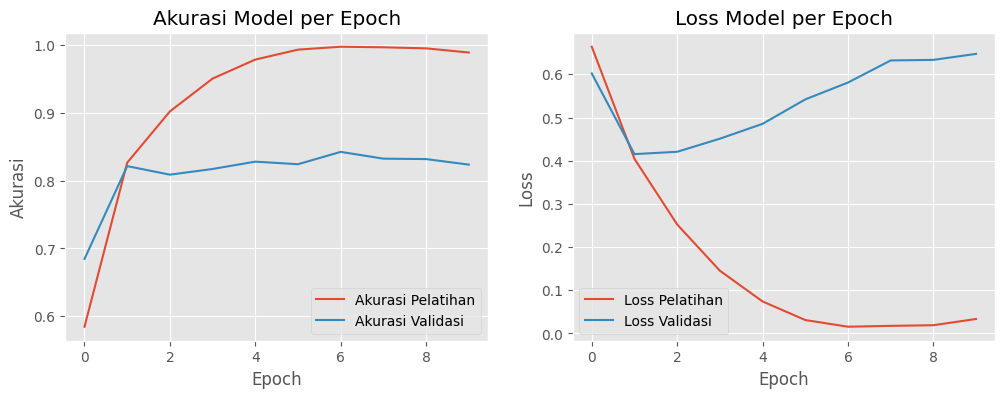


[Echarts untuk Loss Model]


In [8]:
# Plot hasil akurasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Model per Epoch')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend()

# Plot hasil loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Loss Model per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Contoh visualisasi loss menggunakan Echarts (opsional, jika ingin lebih interaktif)
# Menggunakan format Echarts yang bisa ditampilkan di lingkungan yang mendukungnya
print("\n[Echarts untuk Loss Model]")
# Menggunakan Echarts untuk visualisasi yang lebih interaktif

# Menyiapkan data untuk Echarts
epochs_list = list(range(1, epochs + 1))
train_loss = history.history['loss']
val_loss = history.history['val_loss']

## Cell 8: Membuat Prediksi Contoh

Mari kita coba menggunakan model untuk memprediksi sentimen pada ulasan pengujian acak.

In [13]:
# ----------------------------------------------------
# FUNGSI UNTUK MENDAPATKAN TEKS ASLI DARI INDEKS BILANGAN
# ----------------------------------------------------

# Dapatkan kamus pemetaan kata ke indeks
# word_index = imdb.get_word_index()
# Kamus ini seharusnya dimuat hanya sekali, mari pastikan kita menggunakannya.
# Jika Anda menjalankan Cell ini di Jupyter, word_index mungkin belum didefinisikan,
# jadi kita harus memastikan ia dimuat.

# Dapatkan kamus pemetaan kata ke indeks (aman untuk dijalankan di sini)
try:
    word_index = imdb.get_word_index()
except Exception as e:
    # Error: pastikan imdb sudah di-import di Cell 1
    print(f"Error saat memuat word_index: {e}")
    # Berhenti atau definisikan ulang word_index jika perlu

# Balikkan kamus (indeks ke kata). +3 untuk menangani indeks 0, 1, 2 yang dicadangkan.
# Indeks dicadangkan:
# 0: padding (pad)
# 1: start of sequence (sos)
# 2: unknown (unk)
index_word = {v + 3: k for k, v in word_index.items()}

# Tetapkan simbol untuk indeks khusus
index_word[0] = "<PAD>"
index_word[1] = "<START>"
index_word[2] = "<UNK>" # Unknown word/kata tidak dikenal

def decode_review(text_indices):
    """Menerjemahkan urutan bilangan bulat kembali menjadi string kata."""
    # Gunakan .get() dengan nilai default "?" untuk kata-kata yang tidak ada di kamus
    # Gabungkan semua kata menjadi satu string, dipisahkan oleh spasi
    return ' '.join([index_word.get(i, '?') for i in text_indices])

# ----------------------------------------------------
# PROSES PREDIKSI
# ----------------------------------------------------

# Pilih satu ulasan dari set pengujian secara acak
sample_index = np.random.randint(0, len(x_test))
sample_label = y_test[sample_index]

# Ambil ulasan ASLI (sebelum padding) untuk decoding teks.
# Variabel x_test_original didefinisikan di Cell 2 dan merupakan data unpadded.
sample_review_original_indices = x_test_original[sample_index]
decoded_review = decode_review(sample_review_original_indices)

# Ambil ulasan dalam bentuk bilangan (setelah padding) untuk input model.
sample_review_padded = x_test[sample_index]

# Data ulasan perlu diubah bentuknya (reshape) agar cocok untuk input model (1 sampel, maxlen)
input_data = np.expand_dims(sample_review_padded, axis=0)

# Lakukan prediksi
prediction = model.predict(input_data, verbose=0)[0][0]

# Tentukan sentimen berdasarkan ambang batas 0.5
predicted_sentiment = "POSITIF" if prediction > 0.5 else "NEGATIF"
true_sentiment = "POSITIF" if sample_label == 1 else "NEGATIF"

print(f"--- Prediksi Ulasan Indeks {sample_index} ---")
print(f"Probabilitas Sentimen Positif: {prediction:.4f}")
print(f"Prediksi Model: {predicted_sentiment}")
print(f"Sentimen Sebenarnya: {true_sentiment}")
print("-" * 30)
print("Teks Ulasan Asli:")
# Tampilkan teks ulasan, hilangkan simbol <START>
print(decoded_review.replace("<START> ", ""))

--- Prediksi Ulasan Indeks 6154 ---
Probabilitas Sentimen Positif: 0.9997
Prediksi Model: POSITIF
Sentimen Sebenarnya: POSITIF
------------------------------
Teks Ulasan Asli:
this is a superb film and was immediately put in my top ten trust me i know films it's one of the movies that really makes you think not necessarily about the storyline but about yourself the film is about a fifteen year old kid <UNK> fitzgerald who kills an <UNK> boy he is sent to juvenile hall where he meets pearl madison his teacher his relationship with pearl slowly grows and eventually pearl decides to write a story on <UNK> and his peers but as he gets closer to finding out motive he learns he must deal with his own issues first br br this is a great film and a must see with great music by the <UNK> and a fantastic score watch it


Semoga contoh ini membantu Anda memahami alur kerja dasar dalam membangun dan melatih Recurrent Neural Network (RNN) untuk klasifikasi teks. Anda bisa mencoba menyesuaikan parameter seperti `maxlen`, `embedding_dim`, `units`, atau `epochs` untuk melihat bagaimana hal itu memengaruhi kinerja model.

Ini adalah draf yang sesuai untuk tingkat pengenalan di mata kuliah Anda. Lapisan `SimpleRNN` adalah dasar sebelum beralih ke arsitektur yang lebih canggih seperti `LSTM` atau `GRU`.

Jika Anda ingin mendalami topik ini lebih lanjut, Anda bisa mencoba beberapa hal:
1.  **Mengganti `SimpleRNN`** dengan `tf.keras.layers.LSTM` atau `tf.keras.layers.GRU` untuk perbandingan kinerja.
2.  **Menambahkan `Dropout`** setelah lapisan `SimpleRNN` untuk mengurangi *overfitting*.
3.  **Visualisasi Teks Asli:** Menambahkan kode untuk menerjemahkan kembali indeks numerik ke dalam kata-kata aslinya untuk memverifikasi ulasan yang diprediksi.

Bagaimana, apakah Anda ingin mencoba membandingkan kinerja antara `SimpleRNN` dan `LSTM`?